In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("StudentsPerformance.csv")
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


NUMBER OF MALES VS NUMBER OF FEMALES

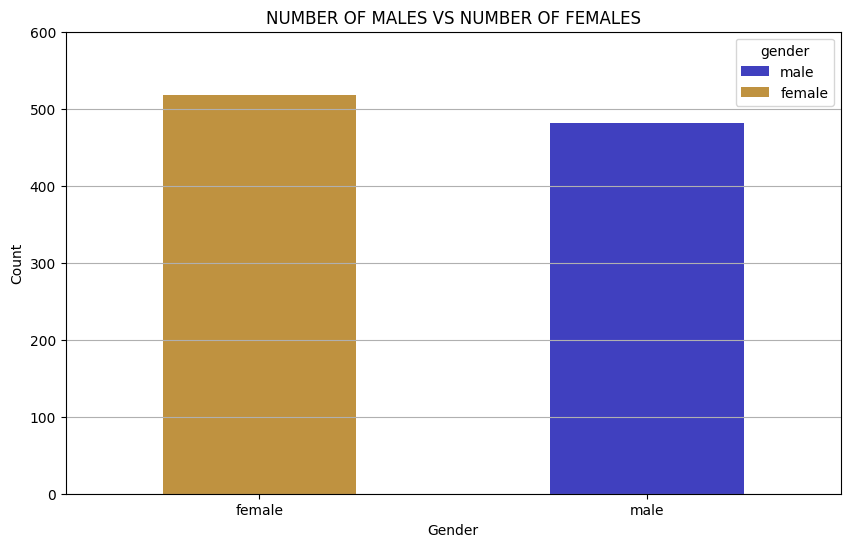

In [6]:
gender_counts=df["gender"].value_counts()
plt.figure(figsize=(10,6))
plt.grid("grey")
sns.barplot(x=gender_counts.index,y=gender_counts.values,hue=gender_counts.index,hue_order=["male","female"],legend=True,palette=["blue","orange"],
            orient='v',saturation=0.5,capsize=0.5,width=0.5,estimator=np.mean)
plt.title("NUMBER OF MALES VS NUMBER OF FEMALES")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.ylim(0,600)
plt.savefig("number_of_males_vs_females.png")
plt.show()

In [7]:
gender_count=df.groupby(["race/ethnicity","gender"]).size().unstack()
print("Number of male and female in each race")
print(gender_count)

Number of male and female in each race
gender          female  male
race/ethnicity              
group A             36    53
group B            104    86
group C            180   139
group D            129   133
group E             69    71


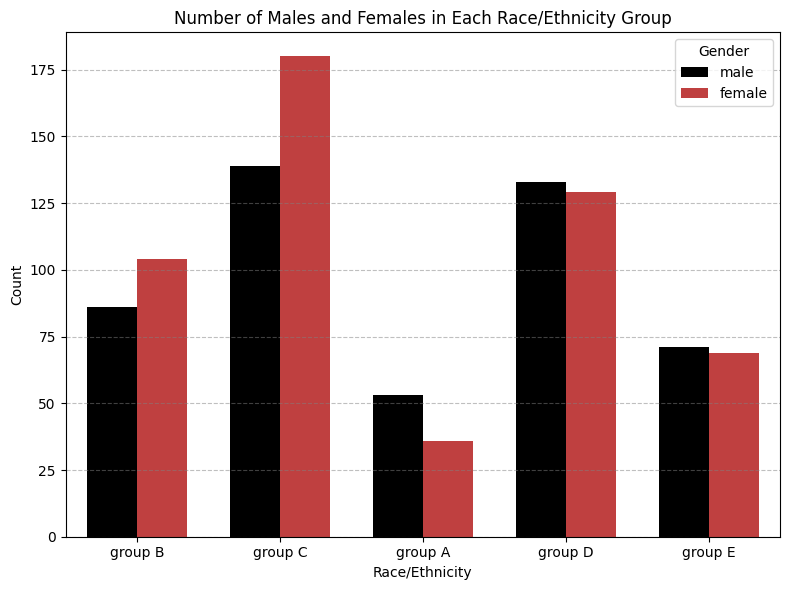

In [8]:
plt.figure(figsize=(8,6))
plt.grid(True,color="grey",linestyle="--",alpha=0.5)
sns.countplot(x="race/ethnicity",data=df,hue="gender",hue_order=["male","female"],palette=["black","red"],saturation=0.5,dodge=True,orient='v',width=0.7)
plt.title("Number of Males and Females in Each Race/Ethnicity Group")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.tight_layout()
plt.legend(title="Gender")
plt.savefig("males_females_in_each_race.png")
plt.show()

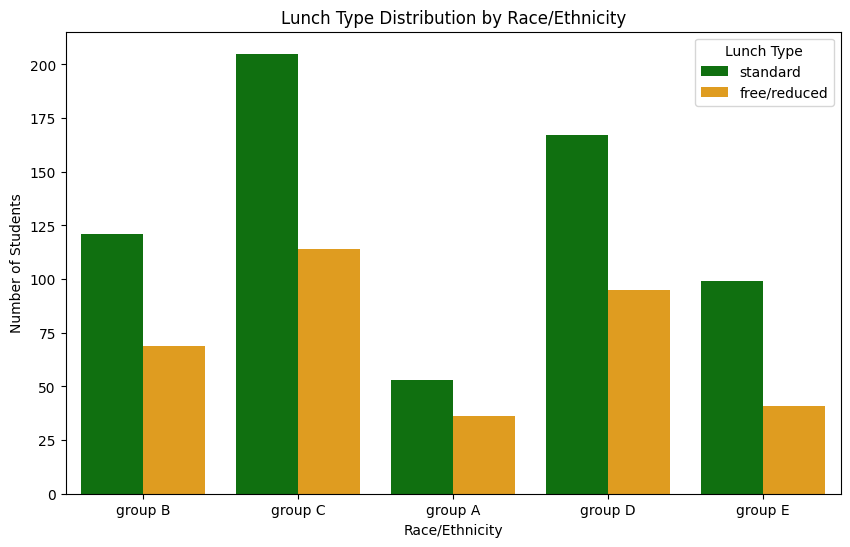

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="race/ethnicity",
    data=df,
    hue="lunch",        # lunch as hue
    palette=["green", "orange"]
)
plt.title("Lunch Type Distribution by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of Students")
plt.legend(title="Lunch Type")
plt.savefig("lunch_type_distribution.png")
plt.show()

In [14]:
student_count=df.groupby(["lunch","race/ethnicity","gender"]).size().unstack()
student_count["total_students"]=student_count.sum(axis=1)
print(student_count)


gender                       female  male  total_students
lunch        race/ethnicity                              
free/reduced group A             14    22              36
             group B             39    30              69
             group C             62    52             114
             group D             51    44              95
             group E             23    18              41
standard     group A             22    31              53
             group B             65    56             121
             group C            118    87             205
             group D             78    89             167
             group E             46    53              99


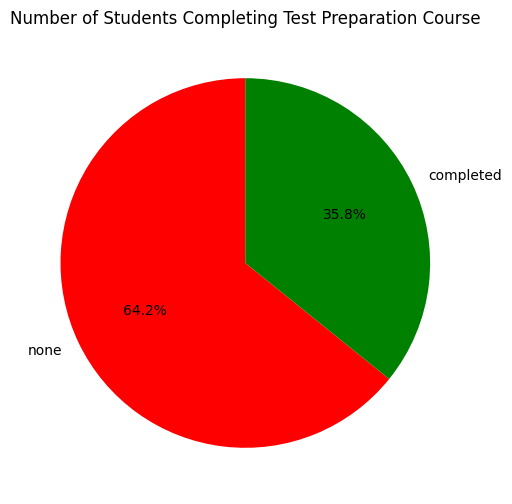

In [36]:
course_counts = df["test preparation course"].value_counts()

plt.figure(figsize=(8,6))
plt.pie(
    course_counts, 
    labels=course_counts.index, 
    autopct="%1.1f%%", 
    colors=["red", "green"], 
    startangle=90,
)
plt.title("Number of Students Completing Test Preparation Course")
plt.savefig("course_completed.png")

plt.show()


        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


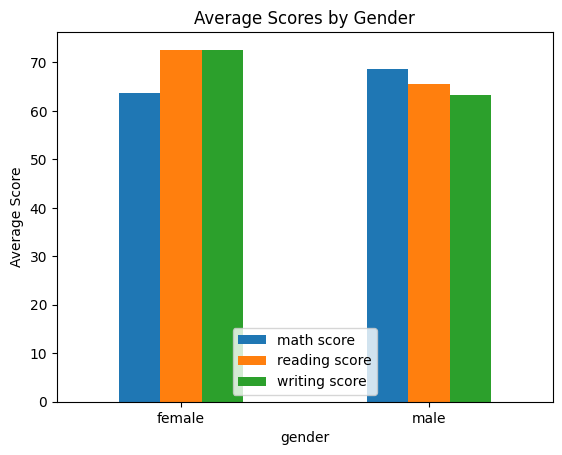

In [25]:
avg_scores_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(avg_scores_gender)

avg_scores_gender.plot(kind='bar')
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.savefig("Avg_score.png")
plt.show()


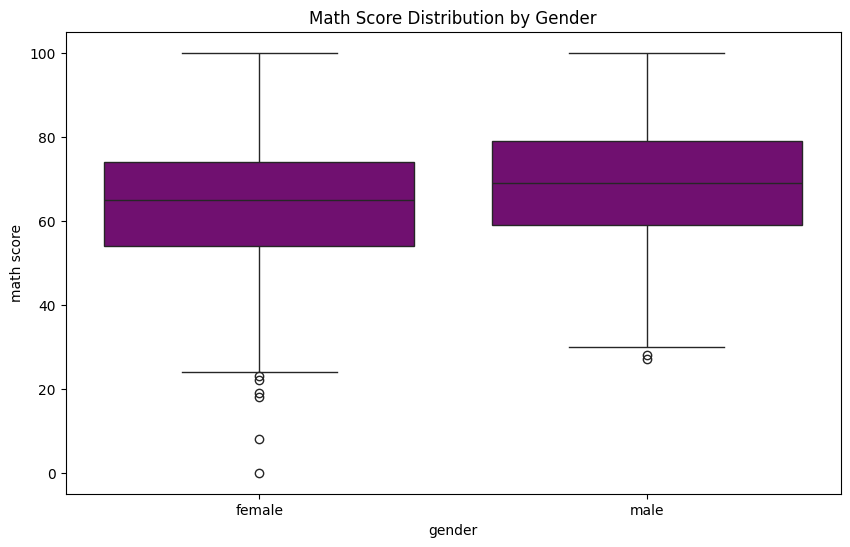

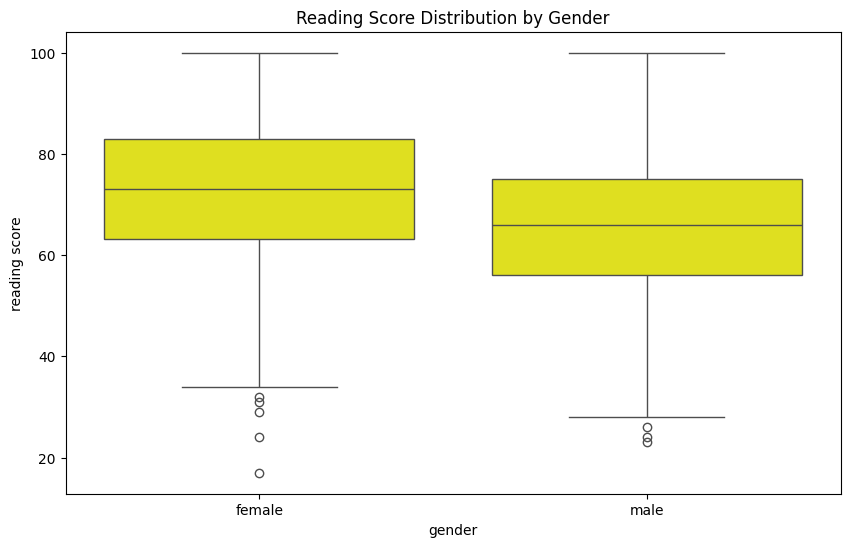

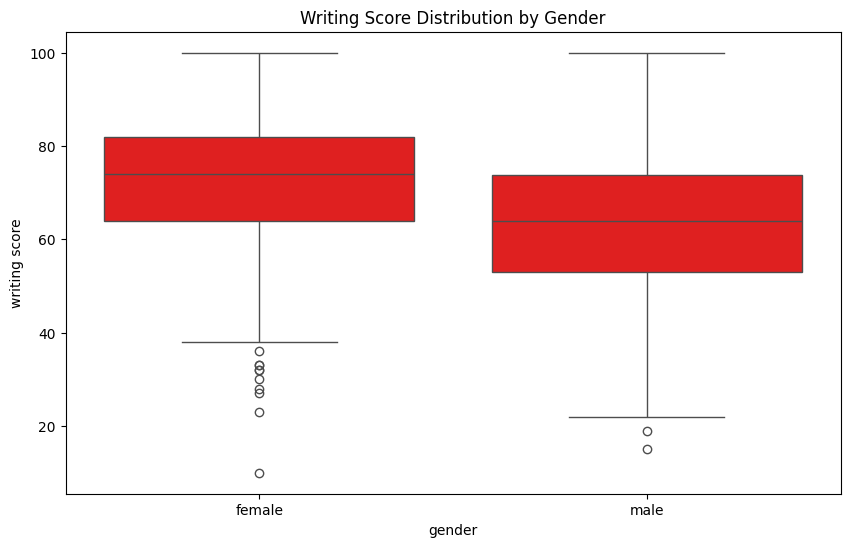

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='math score', data=df,color="purple")
plt.title('Math Score Distribution by Gender')
plt.savefig("math_score.png")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='reading score', data=df,color="yellow")
plt.title('Reading Score Distribution by Gender')
plt.savefig("reading_score.png")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='writing score', data=df,color="red")
plt.title('Writing Score Distribution by Gender')
plt.savefig("writing_score.png")
plt.show()


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


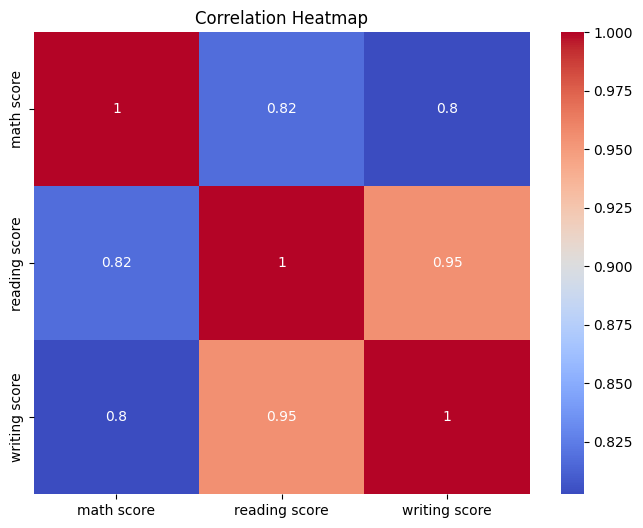

In [34]:
plt.figure(figsize=(8,6))
print(df[['math score','reading score','writing score']].corr())
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap.png")
plt.show()
